# Clustering Boston Marathon Data

I want to take the most recently available Boston Marathon data and cluster it.

In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import pairwise_distances

## Importing the Data

First, I must import and clean the data.

In [2]:
boston = pd.read_csv('https://raw.githubusercontent.com/llimllib/bostonmarathon/master/results/2014/results.csv')

In [3]:
print('Data size:')
print(boston.shape)

Data size:
(31984, 21)


In [4]:
display(boston.head())

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,...,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,NaN,...,8,3.27,NaN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,NaN,...,21,5.30,NaN,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,W2,1,NaN,...,1,3.08,NaN,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
3,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,F2,3,NaN,...,27,5.37,NaN,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
4,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,NaN,...,2,3.10,NaN,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72


In [5]:
boston.country.value_counts()

USA    27233
CAN     2175
GBR      346
ITA      212
MEX      205
GER      182
JPN      175
AUS      124
IRL      119
FRA      115
ESP       89
BRA       87
SWE       66
SUI       62
KOR       60
NED       54
HKG       53
DEN       50
CHN       42
COL       40
CHI       29
ISL       28
FIN       28
BEL       27
SIN       23
AUT       22
NOR       21
RSA       19
VEN       19
BER       18
       ...  
TUR        4
MAS        4
SVK        4
PHI        4
ECU        3
UKR        3
PAN        3
HUN        3
DOM        3
EGY        2
THA        2
BAH        2
ESA        2
QAT        2
ROU        2
EST        1
BLR        1
BOL        1
BRN        1
TRI        1
MAR        1
URU        1
LIE        1
INA        1
CAY        1
TAN        1
ZIM        1
VGB        1
BAR        1
CRO        1
Name: country, Length: 78, dtype: int64

In [6]:
boston.isnull().sum()

10k              0
name             0
division         0
25k              0
gender           0
age              0
official         0
bib              0
genderdiv        0
ctz          30740
35k              0
overall          0
pace             0
state         2576
30k              0
5k               0
half             0
20k              0
country          0
city             1
40k              0
dtype: int64

In [7]:
boston_data = boston.drop(['name','ctz','state','country','city','bib'],1)

The 'ctz' and 'state' columns had more null values so they were dropped. Still, they would have been dropped anyway along with the 'name', 'country', 'city' columns simply because they are categorical and I cannot cluster with them.  It would be probably be possible to make dummy variables for country, but that would clog my data and make my clustering much less efficient.  It probably would not be worth the comuting power it would waste.

In [8]:
# create list to hold indices where participants did not compete
problem_index = []

In [9]:
c = list(boston_data.columns)

In [10]:
boston_data['age'].astype(str).str.contains('-').sum()

0

In [11]:
for var in c: 
    print(var,': ',boston_data[var].astype(str).str.contains('-').sum())

10k :  50
division :  0
25k :  216
gender :  0
age :  0
official :  0
genderdiv :  0
35k :  34
overall :  0
pace :  0
30k :  40
5k :  52
half :  72
20k :  51
40k :  39


In [12]:
var = ['5k','10k','20k','25k','30k','35k','40k','half']
for v in var:
    boston_data[boston_data[v]=='-']
    a = list(boston_data[boston_data[v]=='-'].index)
    problem_index = problem_index + a

In [13]:
problem_index = set(problem_index)
problem_index = list(problem_index)
print('Removing the ',len(problem_index),' data points when the participants did not finish one of the races')

boston_data = boston_data.drop(problem_index)

Removing the  335  data points when the participants did not finish one of the races


In [14]:
boston_data.gender = np.where(boston_data.gender=='F',0,1)

# Clustering

I want to be able to test the consistency of my solution, so I will split the data into 8 equal peices to test. 

In [15]:
# Normalize
boston_norm = normalize(boston_data)

In [16]:
# Split the data into four equally-sized samples. First we break it in half:
X_half1, X_half2 = train_test_split(
    boston_norm,
    test_size=0.5,
    random_state=42)

# Then we halve the halves.
X_q1, X_q2 = train_test_split(
    X_half1,
    test_size=0.5,
    random_state=42)

X_q3, X_q4 = train_test_split(
    X_half2,
    test_size=0.5,
    random_state=42)

# Halve the halved halves to make eights
X1, X2 = train_test_split(
    X_q1,
    test_size=0.5,
    random_state=42)

X3, X4 = train_test_split(
    X_q2,
    test_size=0.5,
    random_state=42)

X5, X6 = train_test_split(
    X_q3,
    test_size=0.5,
    random_state=42)

X7, X8 = train_test_split(
    X_q4,
    test_size=0.5,
    random_state=42)


## K-Means

I will try K-Means algorithm using 2 through 6 clusters to see which configuration works best.

In [17]:
scores = pd.DataFrame()

In [18]:
from sklearn.cluster import KMeans

In [19]:
for clusters in [2,3,4,5,6]:
    print('\n{} clusters'.format(clusters))
    n=1
    for sample in [X1,X2,X3,X4,X5,X6,X7,X8]:
        a = []
        model = KMeans(n_clusters=clusters, random_state=42).fit(sample)
        labels = model.labels_
        score = metrics.silhouette_score(sample, labels, metric='euclidean')
        print('X{} Score: {}'.format(n,score))
        a.append(score)
        n=n+1


2 clusters
X1 Score: 0.44872452984389244
X2 Score: 0.45647116162456486
X3 Score: 0.4801174870862263
X4 Score: 0.4542764644276751
X5 Score: 0.44938873158068815
X6 Score: 0.45862154047692627
X7 Score: 0.4482513706566841
X8 Score: 0.44422496338321343

3 clusters
X1 Score: 0.48458835380199683
X2 Score: 0.47580390931899375
X3 Score: 0.45685024961521126
X4 Score: 0.48117687720826186
X5 Score: 0.47848565126999126
X6 Score: 0.4780156714892416
X7 Score: 0.4803957949644856
X8 Score: 0.4822236783493554

4 clusters
X1 Score: 0.49608116821491616
X2 Score: 0.49262023018598605
X3 Score: 0.48860857333585633
X4 Score: 0.4967802411633486
X5 Score: 0.4941940242069862
X6 Score: 0.49589204755247773
X7 Score: 0.49818497905353293
X8 Score: 0.49842634909532657

5 clusters
X1 Score: 0.4545757269210209
X2 Score: 0.37907308541965296
X3 Score: 0.4475316311745548
X4 Score: 0.4480488512012007
X5 Score: 0.39731342327325736
X6 Score: 0.44556192878478096
X7 Score: 0.4567685445995674
X8 Score: 0.4597734886422817

6 cl

4 clusters appears to be the most consistent configuration of K-Means. I wilkl run the algorithm again to store the results.

In [20]:
for sample in [X1,X2,X3,X4,X5,X6,X7,X8]:
    score_k4 = []
    model = KMeans(n_clusters=4, random_state=42).fit(sample)
    labels = model.labels_
    score = metrics.silhouette_score(sample, labels, metric='euclidean')
    score_k4.append(score)

## Mean Shift

I will try mean shift with optimal settings for this data.

In [21]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X1, quantile=0.2, n_samples=500)

In [25]:
for sample in [X1,X2,X3,X4,X5,X6,X7,X8]:
    ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    ms.fit(sample)
    labels = ms.labels_
    score = metrics.silhouette_score(sample, labels, metric='euclidean')
    n_clusters_ = len(np.unique(labels))
    print("Clusters: {}  Score: {}".format(n_clusters_,score))  

Clusters: 3  Score: 0.5068115062326602
Clusters: 5  Score: 0.4354864471575222
Clusters: 4  Score: 0.5181994318609359
Clusters: 4  Score: 0.5303146873914673
Clusters: 7  Score: 0.4517055478101586
Clusters: 5  Score: 0.41346086794227394
Clusters: 5  Score: 0.4033016347396149
Clusters: 4  Score: 0.5270419955756872


Mean shift is not very cinsistent at all with this data.

## Spectral Affinity 

In [26]:
from sklearn.cluster import SpectralClustering

In [27]:
print('2 Clusters')
for sample in [X1, X2, X3, X4,X5,X6,X7,X8]:
    n_clusters=2
    sc = SpectralClustering(n_clusters=n_clusters,random_state=42)
    sc.fit(sample)
    predict = sc.fit_predict(sample)
    print(metrics.silhouette_score(sample, predict, metric='euclidean'))

0.4219621856288802
0.44499138413142214
0.4607459535888277
0.43810581197362863
0.439202555008501
0.4419151753998351
0.4396669166174898
0.4274090088414685


In [28]:
print('3 Clusters')
for sample in [X1, X2, X3, X4,X5,X6,X7,X8]:
    n_clusters=3
    sc = SpectralClustering(n_clusters=n_clusters)
    sc.fit(sample)
    predict = sc.fit_predict(sample)
    print(metrics.silhouette_score(sample, predict, metric='euclidean'))

3 Clusters
0.48442919391184835
0.4737413375605101
0.40301935050181553
0.47856619142579326
0.47688147616407617
0.47533848711983445
0.4788307846911644
0.47920023462563544


In [29]:
print('4 Clusters')
for sample in [X1, X2, X3, X4,X5,X6,X7,X8]:
    score_s4 = []
    n_clusters=4
    sc = SpectralClustering(n_clusters=n_clusters)
    sc.fit(sample)
    predict = sc.fit_predict(sample)
    score = metrics.silhouette_score(sample, predict, metric='euclidean')
    print(score)
    score_s4.append(score)

0.49387183654293776
0.49157655900527913
0.4854688372970365
0.49522443863006865
0.4911637551852718
0.4933084668663269
0.49629125620864845
0.4962526500035263


In [30]:
print('5 Clusters')
for sample in [X1, X2, X3, X4,X5,X6,X7,X8]:
    n_clusters=5
    sc = SpectralClustering(n_clusters=n_clusters)
    sc.fit(sample)
    predict = sc.fit_predict(sample)
    print(metrics.silhouette_score(sample, predict, metric='euclidean'))

0.43793074081222366
0.4381682447143053
0.4283498942389413
0.4368797576708418
0.434135113082674
0.4356336857796402
0.4400309109783827
0.43825528072128067


In [31]:
print('6 Clusters')
for sample in [X1, X2, X3, X4,X5,X6,X7,X8]:
    n_clusters=6
    sc = SpectralClustering(n_clusters=n_clusters)
    sc.fit(sample)
    predict = sc.fit_predict(sample)
    print(metrics.silhouette_score(sample, predict, metric='euclidean'))

0.42317786108426414
0.40327426150228
0.3906156681938359
0.40942619418496157
0.413425075581812
0.4178036330581078
0.41647945729350755
0.4093877878602887


Once again, 4 clusters seems to be the be configuration for this data. I will store the 4 cluster spectral affinity score and compare it to the K-Means 4 cluster score.

## Modeling Conclusion

In [32]:
score_k4 = np.array(score_k4)
print(score_k4.mean())
print(score_k4.std())

0.49842634909532657
0.0


In [33]:
score_s4 = np.array(score_s4)
print(score_s4.mean())
print(score_s4.std())

0.4962526500035263
0.0


K-Means with 4 Clusters appears to be the best clustering solution. 

# Data Story

Once you have a solution you like, write a data story, including visualizations, where you teach the reader something about the Boston Marathon based on your clusters

In [36]:
model = KMeans(n_clusters=4, random_state=42).fit(boston_data)
labels = model.labels_

In [37]:
len(labels)

31649

In [38]:
boston = boston.drop(problem_index)

In [39]:
boston['labels'] = labels

In [40]:
boston['label'] = list(labels)

In [41]:
boston.head()

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,...,state,30k,5k,half,20k,country,city,40k,labels,label
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,NaN,...,NaN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43,3,3
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,NaN,...,NaN,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10,3,3
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,W2,1,NaN,...,NaN,56.45,7.75,38.03,36.10,RSA,Paarl,76.10,3,3
3,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,F2,3,NaN,...,NaN,99.33,16.20,69.47,65.83,ETH,Shoa,132.95,3,3
4,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,NaN,...,NaN,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72,3,3


In [65]:
boston['10k'] = boston['10k'].astype(float)
boston['division'] = boston['division'].astype(float)
boston['age'] = boston['age'].astype(float)
boston['official'] = boston['official'].astype(float)
boston['genderdiv'] = boston['genderdiv'].astype(float)
boston['30k'] = boston['30k'].astype(float)
boston['5k'] = boston['5k'].astype(float)
boston['half'] = boston['half'].astype(float)
boston['20k'] = boston['20k'].astype(float)
boston['40k'] = boston['40k'].astype(float)

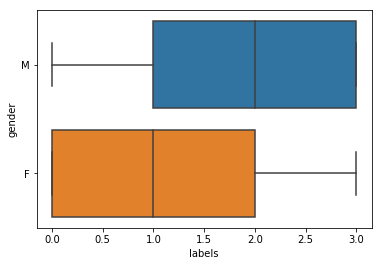

In [94]:
sns.boxplot(data=boston,x='labels',y='gender')
plt.show()

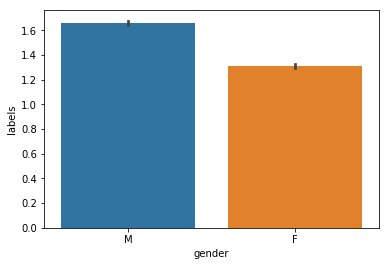

In [96]:
sns.barplot(data=boston,y='labels',x='gender')

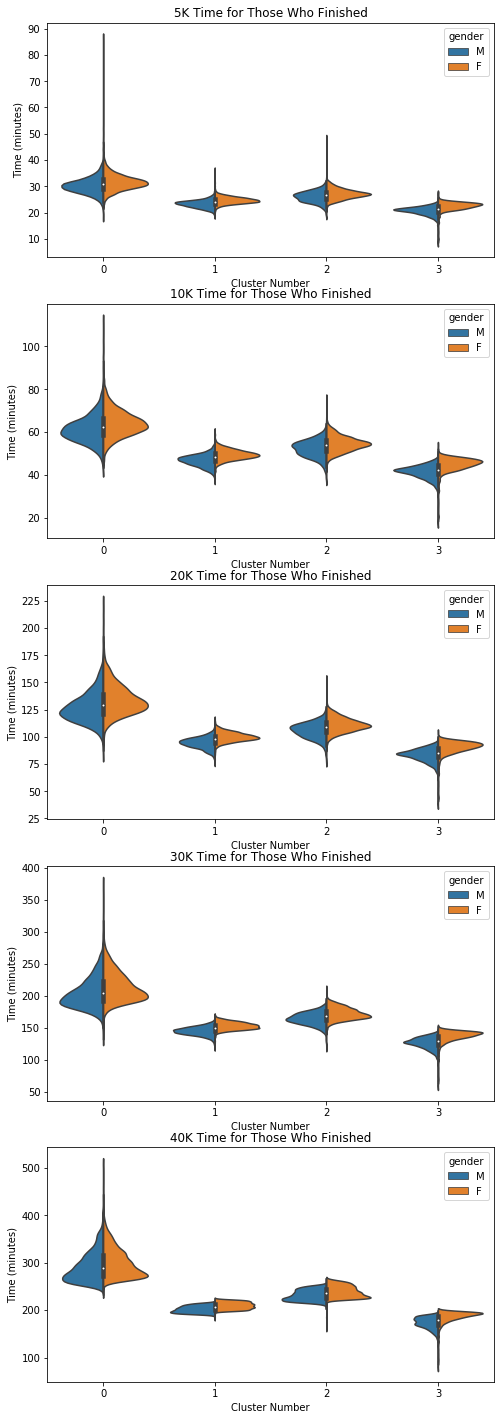

In [92]:
fig = plt.figure(figsize=(8, 25))
ax = fig.add_subplot(511)
sns.violinplot(x="labels", y="5k", hue="gender", data=boston, split=True, ax=ax)
plt.xlabel('Cluster Number')
plt.ylabel('Time (minutes)')
plt.title('5K Time for Those Who Finished')

ax = fig.add_subplot(512)
sns.violinplot(x="labels", y="10k", hue="gender", data=boston, split=True, ax=ax)
plt.xlabel('Cluster Number')
plt.ylabel('Time (minutes)')
plt.title('10K Time for Those Who Finished')

ax = fig.add_subplot(513)
sns.violinplot(x="labels", y="20k", hue="gender", data=boston, split=True, ax=ax)
plt.xlabel('Cluster Number')
plt.ylabel('Time (minutes)')
plt.title('20K Time for Those Who Finished')

ax = fig.add_subplot(514)
sns.violinplot(x="labels", y="30k", hue="gender", data=boston, split=True, ax=ax)
plt.xlabel('Cluster Number')
plt.ylabel('Time (minutes)')
plt.title('30K Time for Those Who Finished')

ax = fig.add_subplot(515)
sns.violinplot(x="labels", y="40k", hue="gender", data=boston, split=True, ax=ax)
plt.xlabel('Cluster Number')
plt.ylabel('Time (minutes)')
plt.title('40K Time for Those Who Finished')

plt.show()

Cluster 3 is the group the faster groups, while group 0 is the slowest groups. Interestingly, group 2 appears to be slower than group 1, but both have very similar speeds.